In [55]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


Importing dependencies

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing Main Dataset

In [101]:
dataset = pd.read_csv('Suicide_Detection.csv', sep=',')
dataset.head(10)

Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide
5          11  Honetly idkI dont know what im even doing here...      suicide
6          12  [Trigger warning] Excuse for self inflicted bu...      suicide
7          13   It ends tonight.I can’t do it anymore. \nI quit.      suicide
8          16  Everyone wants to be "edgy" and it's making me...  non-suicide
9          18  My life is over at 20 years oldHello all. I am...      suicide

Preprocessing Data

1- Checking missing values

2 - Checking distribution of classes

3- LowerCase

4- Punctuation

5- Stop Words

6- Tokenizing 

7- Lemmatizing

<AxesSubplot:>

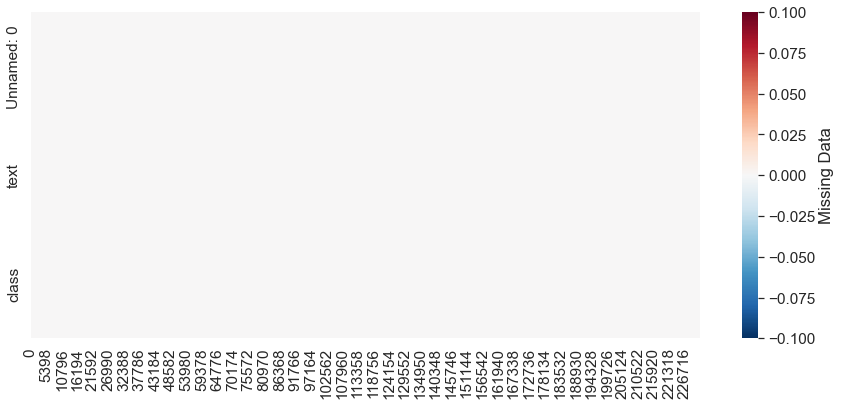

In [105]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.isnull().transpose(),cmap="RdBu_r",cbar_kws={'label': 'Missing Data'})
#No missing values visible, Good data !

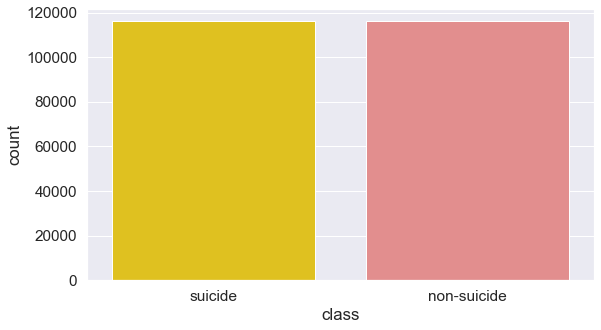

In [106]:
classes_num = dataset['class'].value_counts()

# Define a custom color palette
custom_palette = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='class', palette=custom_palette)

plt.show()


In [107]:
#Transforming text into lowercase text
dataset['text'] = dataset['text'].str.lower()
dataset['text']

0         ex wife threatening suiciderecently i left my ...
1         am i weird i don't get affected by compliments...
2         finally 2020 is almost over... so i can never ...
3                 i need helpjust help me im crying so hard
4         i’m so losthello, my name is adam (16) and i’v...
                                ...                        
232069    if you don't like rock then your not going to ...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find herei'm not posting t...
232073    i still haven't beaten the first boss in hollo...
Name: text, Length: 232074, dtype: object

In [108]:
#removing punctuation
dataset['text'] = dataset['text'].str.replace(r'[^\w\s]+', '',regex=True)
dataset['text']

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         im so losthello my name is adam 16 and ive bee...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea can someone...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: text, Length: 232074, dtype: object

In [110]:
def remove_stop_words(text):
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

dataset['text'] = dataset['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
dataset['text']

0         ex wife threatening suiciderecently left wife ...
1         weird dont get affected compliments coming som...
2         finally 2020 almost never hear 2020 bad year e...
3                         need helpjust help im crying hard
4         im losthello name adam 16 ive struggling years...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friends lonely everything deprived p...
232071    pee probably tastes like salty tea someone dra...
232072    usual stuff find hereim posting sympathy pity ...
232073    still havent beaten first boss hollow knight i...
Name: text, Length: 232074, dtype: object

In [112]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [113]:
dataset['text'] = dataset['text'].map(tokenize_text)

In [114]:
dataset['text']

0         [ex, wife, threatening, suiciderecently, left,...
1         [weird, dont, get, affected, compliments, comi...
2         [finally, 2020, almost, never, hear, 2020, bad...
3                  [need, helpjust, help, im, crying, hard]
4         [im, losthello, name, adam, 16, ive, strugglin...
                                ...                        
232069    [dont, like, rock, going, get, anything, go, h...
232070    [tell, many, friends, lonely, everything, depr...
232071    [pee, probably, tastes, like, salty, tea, some...
232072    [usual, stuff, find, hereim, posting, sympathy...
232073    [still, havent, beaten, first, boss, hollow, k...
Name: text, Length: 232074, dtype: object

In [115]:
lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
dataset['text'] = dataset['text'].map(lemmatize_sentence)

In [117]:
dataset.head() 

Unnamed: 0                                               text        class
0           2  ex wife threatening suiciderecently left wife ...      suicide
1           3  weird dont get affected compliment coming some...  non-suicide
2           4  finally 2020 almost never hear 2020 bad year e...  non-suicide
3           8                     need helpjust help im cry hard      suicide
4           9  im losthello name adam 16 ive struggling year ...      suicide

In [ ]:
dataset.to_csv('Clean Dataset.csv')

Importing the clean dataset

In [ ]:
dataset = pd.read_csv('Clean Dataset.csv')
dataset

Unnamed: 0.1  Unnamed: 0   
0                  0           2  \
1                  1           3   
2                  2           4   
3                  3           8   
4                  4           9   
...              ...         ...   
232069        232069      348103   
232070        232070      348106   
232071        232071      348107   
232072        232072      348108   
232073        232073      348110   

                                                     text        class  
0       ex wife threatening suiciderecently left wife ...      suicide  
1       weird dont get affected compliment coming some...  non-suicide  
2       finally 2020 almost never hear 2020 bad year e...  non-suicide  
3                          need helpjust help im cry hard      suicide  
4       im losthello name adam 16 ive struggling year ...      suicide  
...                                                   ...          ...  
232069  dont like rock going get anything go httpsmusi...  non-suicide  
232070  tell many friend lonely everything deprived pr...  non-suicide  
232071  pee probably taste like salty tea someone dran...  non-suicide  
232072  usual stuff find hereim posting sympathy pity ...      suicide  
232073  still havent beaten first bos hollow knight iv...  non-suicide  

[232074 rows x 4 columns]

Removing missing values

In [ ]:
print(dataset[dataset['text'].isnull()].index)

Index([   408,   9592,  11476,  20544,  21188,  25293,  26469,  35823,  47558,
        48923,  55136,  77776,  81678, 100144, 102482, 106269, 119023, 119820,
       125343, 126125, 131489, 137872, 178192, 181086, 181731, 200265, 204433,
       205215, 207446, 210846, 216154, 231259],
      dtype='int64')


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
print(dataset[dataset['text'].isnull()].index)

Index([], dtype='int64')


In [ ]:
X = dataset['text']
y = dataset['class'].replace({'suicide':1,'non-suicide':0})
X

0         ex wife threatening suiciderecently left wife ...
1         weird dont get affected compliment coming some...
2         finally 2020 almost never hear 2020 bad year e...
3                            need helpjust help im cry hard
4         im losthello name adam 16 ive struggling year ...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friend lonely everything deprived pr...
232071    pee probably taste like salty tea someone dran...
232072    usual stuff find hereim posting sympathy pity ...
232073    still havent beaten first bos hollow knight iv...
Name: text, Length: 232042, dtype: object

Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=4)
len(X_train),len(X_test)

(220439, 11603)

Term Frequency Inverse Document Frequency ( TF-IDF Vectorizer )

In [ ]:
max_features_values = [5000, 10000]

tfidf_vectorizer = TfidfVectorizer()
 
param_grid = {
    'max_features': max_features_values,
}

grid_search = GridSearchCV(tfidf_vectorizer, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_['max_features']

print(f"Best max_features: {best_max_features}")

best_tfidf_vectorizer = grid_search.best_estimator_

pickle.dump(best_tfidf_vectorizer, open('grid_search_15000_tfidf.pkl', 'wb'))

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warn

Best max_features: 5000


In [149]:
best_tfidf_vectorizer = pickle.load(open('grid_search_15000_tfidf.pkl', 'rb'))

In [ ]:
X_train_tfidf = best_tfidf_vectorizer.transform(X_train)
X_test_tfidf = best_tfidf_vectorizer.transform(X_test)

num_train_samples, _ = X_train_tfidf.shape
num_test_samples, _ = X_test_tfidf.shape

print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 220439
Number of test samples: 11603


In [ ]:
# Convert your sparse TF-IDF matrices to dense numpy arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

Modeling Section

In [ ]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting='soft')

VotingClassifiers.fit(X_train_dense, y_train)

pickle.dump(VotingClassifiers, open('Voting_classifier.pkl', 'wb'))

Training score: 0.9023267207708255
Testing score: 0.8966646556924933


In [ ]:
VotingClassifiers = pickle.load(open('Voting_classifier.pkl', 'rb'))

In [ ]:
print('Training score:', VotingClassifiers.score(X_train_dense, y_train))
print('Testing score:', VotingClassifiers.score(X_test_dense, y_test))

Training score: 0.9023267207708255
Testing score: 0.8966646556924933


Testing model on a New Dataset

In [136]:
new_dataset = pd.read_csv('test_suicide.csv')
new_dataset.head()

Tweet                  Suicide
0                                  making some lunch         Not Suicide post
1                        @Alexia You want his money.         Not Suicide post
2  @dizzyhrvy that crap took me forever to put to...  Potential Suicide post 
3  @jnaylor #kiwitweets Hey Jer! Since when did y...         Not Suicide post
4  Trying out &quot;Delicious Library 2&quot; wit...         Not Suicide post

In [137]:
new_dataset['Tweet']

0                                       making some lunch
1                             @Alexia You want his money.
2       @dizzyhrvy that crap took me forever to put to...
3       @jnaylor #kiwitweets Hey Jer! Since when did y...
4       Trying out &quot;Delicious Library 2&quot; wit...
                              ...                        
1782      i have forgotten how much i love my Nokia N95-1
1783    Starting my day out with a positive attitude! ...
1784    @belledame222 Hey, it's 5 am...give a girl som...
1785    2 drunken besties stumble into my room and we ...
1786    @dancingbonita &quot;I friggin love you!!!&quo...
Name: Tweet, Length: 1787, dtype: object

In [138]:
new_dataset['Tweet'] = new_dataset['Tweet'].str.lower()
new_dataset['Tweet']

0                                       making some lunch
1                             @alexia you want his money.
2       @dizzyhrvy that crap took me forever to put to...
3       @jnaylor #kiwitweets hey jer! since when did y...
4       trying out &quot;delicious library 2&quot; wit...
                              ...                        
1782      i have forgotten how much i love my nokia n95-1
1783    starting my day out with a positive attitude! ...
1784    @belledame222 hey, it's 5 am...give a girl som...
1785    2 drunken besties stumble into my room and we ...
1786    @dancingbonita &quot;i friggin love you!!!&quo...
Name: Tweet, Length: 1787, dtype: object

In [139]:
new_dataset['Tweet'] = new_dataset['Tweet'].str.replace(r'[^\w\s]|(\d+\.\d+|\d+)', '', regex=True)
new_dataset['Tweet']

0                                       making some lunch
1                               alexia you want his money
2       dizzyhrvy that crap took me forever to put tog...
3       jnaylor kiwitweets hey jer since when did you ...
4       trying out quotdelicious library quot with mix...
                              ...                        
1782          i have forgotten how much i love my nokia n
1783    starting my day out with a positive attitude t...
1784    belledame hey its  amgive a girl some credit f...
1785     drunken besties stumble into my room and we r...
1786    dancingbonita quoti friggin love youquot ron b...
Name: Tweet, Length: 1787, dtype: object

In [140]:
def remove__stop_words(text):
    clean_text = ' '.join([word for word in str(text).split() if word.lower() not in stop_words])
    return clean_text

new_dataset['Tweet'] = new_dataset['Tweet'].apply(remove__stop_words)

In [141]:
new_dataset['Tweet']

0                                            making lunch
1                                       alexia want money
2       dizzyhrvy crap took forever put together iâm g...
3       jnaylor kiwitweets hey jer since start twittering
4       trying quotdelicious library quot mixed result...
                              ...                        
1782                          forgotten much love nokia n
1783    starting day positive attitude great watch gre...
1784              belledame hey amgive girl credit trying
1785    drunken besties stumble room run around sober ...
1786    dancingbonita quoti friggin love youquot ron b...
Name: Tweet, Length: 1787, dtype: object

In [142]:
new_dataset['Tweet'] = new_dataset['Tweet'].map(tokenize_text)
new_dataset['Tweet']

0                                         [making, lunch]
1                                   [alexia, want, money]
2       [dizzyhrvy, crap, took, forever, put, together...
3       [jnaylor, kiwitweets, hey, jer, since, start, ...
4       [trying, quotdelicious, library, quot, mixed, ...
                              ...                        
1782                    [forgotten, much, love, nokia, n]
1783    [starting, day, positive, attitude, great, wat...
1784       [belledame, hey, amgive, girl, credit, trying]
1785    [drunken, besties, stumble, room, run, around,...
1786    [dancingbonita, quoti, friggin, love, youquot,...
Name: Tweet, Length: 1787, dtype: object

In [144]:
new_dataset['Tweet'] = new_dataset['Tweet'].map(lemmatize_sentence)

In [145]:
new_dataset['Tweet']

0                                            making lunch
1                                       alexia want money
2       dizzyhrvy crap took forever put together iâm g...
3       jnaylor kiwitweets hey jer since start twittering
4       trying quotdelicious library quot mixed result...
                              ...                        
1782                          forgotten much love nokia n
1783    starting day positive attitude great watch gre...
1784              belledame hey amgive girl credit trying
1785    drunken besties stumble room run around sober ...
1786    dancingbonita quoti friggin love youquot ron b...
Name: Tweet, Length: 1787, dtype: object

In [146]:
print(new_dataset[new_dataset['Tweet'].isnull()].index) #No missing values

Index([], dtype='int64')


In [161]:
X_new = new_dataset['Tweet']
y_new = new_dataset['Suicide'].replace({'Potential Suicide post ':1,'Not Suicide post':0})
X_new

0                                            making lunch
1                                       alexia want money
2       dizzyhrvy crap took forever put together iâm g...
3       jnaylor kiwitweets hey jer since start twittering
4       trying quotdelicious library quot mixed result...
                              ...                        
1782                          forgotten much love nokia n
1783    starting day positive attitude great watch gre...
1784              belledame hey amgive girl credit trying
1785    drunken besties stumble room run around sober ...
1786    dancingbonita quoti friggin love youquot ron b...
Name: Tweet, Length: 1787, dtype: object

In [162]:
y_new.iloc[500:510]

500    0
501    0
502    0
503    1
504    1
505    1
506    0
507    1
508    0
509    1
Name: Suicide, dtype: int64

In [163]:
best_tfidf_vectorizer = pickle.load(open('grid_search_15000_tfidf.pkl', 'rb'))
VotingClassifiers = pickle.load(open('Voting_classifier.pkl', 'rb'))

In [164]:
X_new_tfidf = best_tfidf_vectorizer.transform(X_new)
X_new_tfidf = X_new_tfidf.toarray()

In [165]:
print('Testing score:', VotingClassifiers.score(X_new_tfidf, y_new))

Testing score: 0.7073307218802463


KNN Model 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_dense = sc.fit_transform(X_train_dense)
X_test_dense = sc.transform(X_test_dense)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train_dense, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
print('Training score:', classifier_KNN.score(X_train_dense, y_train))
print('Testing score:', classifier_KNN.score(X_test_dense, y_test))

In [167]:
#We're keeping the Naives Bayes because they have the best accuracy

Preprocessing Function for sentences

In [ ]:
def preprocess(element):
    element = element.lower() #convert to lower case 
    element = element.replace(r'[^\w\s]+', '') #remove punctuations
    element = [word for word in element.split() if word not in (stop_words)] #tokenize the sentence
    element = ' '.join([lemmatizer.lemmatize(i) for i in element]) #lemmatizing
    inputToModel = best_tfidf_vectorizer.transform([element]).toarray() #transform to vector form
    return inputToModel

Function to predict preprocessed sentences

In [ ]:
def predict_voting(input_text):
    print('Input : ',input_text) 
    processed_array = preprocess(input_text) 
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    if predict[0] == 1:
        print('Output : Suicidal thought detected')
    else:
        print('Output : No suicidal thoughts detected')

In [ ]:
predict_voting("My life is so miserable and it's not getting better.")

Input :  My life is so miserable and it's not getting better.
Output : Suicidal thought detected


In [ ]:
predict_voting("Let's go for a hike !")

Input :  Let's go for a hike !
Output : No suicidal thoughts detected


Confusion Matrix For accuracy Vizualisation

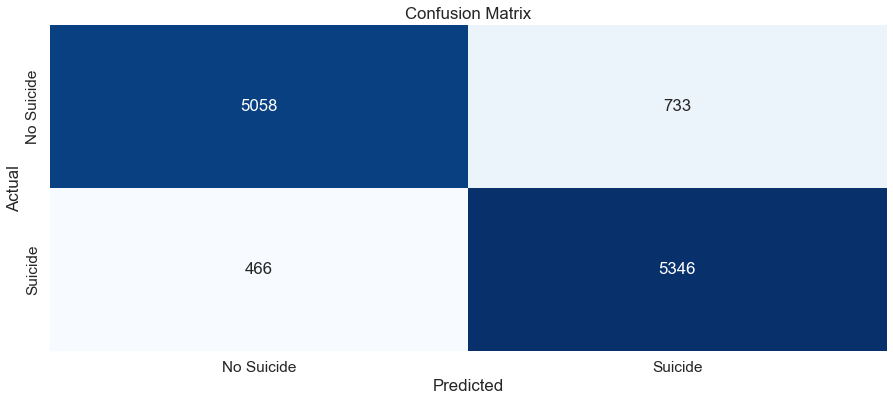

0.8966646556924933

In [ ]:
y_pred = VotingClassifiers.predict(X_test_dense)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 6))
sns.set(font_scale=1.4)  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Suicide', 'Suicide'],
            yticklabels=['No Suicide', 'Suicide'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

accuracy_score(y_test, y_pred)

Calibration Curve

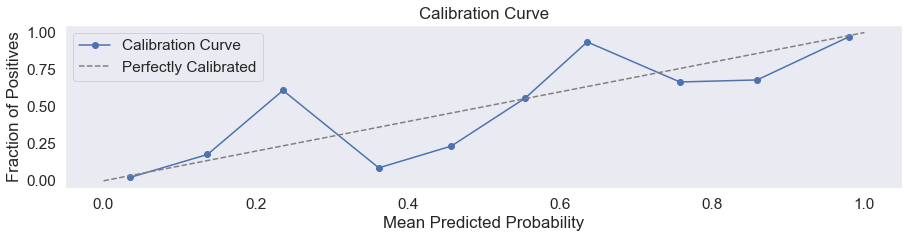

In [ ]:
#The calibration curve assesses how well a binary classification model's
#predicted probabilities match actual outcomes. It plots the average predicted probability
#against the actual fraction of positive cases. A well-calibrated model's curve aligns closely with the ideal diagonal line.

y_prob = VotingClassifiers.predict_proba(X_test_dense)[:, 1]

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10, strategy='uniform')

plt.figure(figsize=(15, 3))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='b', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc='best')
plt.grid()
plt.show()
